# _**KNN algorithm 02/04/2025**_

# Installing dependencies

In [ ]:
! pip install scikit-learn

# Importing libraries

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# Reading data [csv]

showing subplots


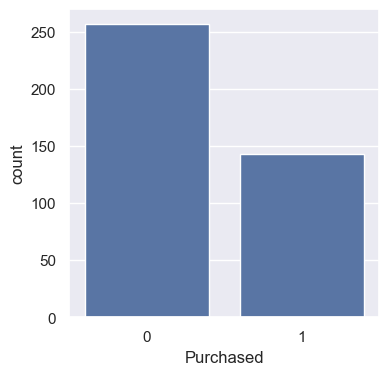

In [18]:
dfr = pd.read_csv('./xl/Social_Network_Ads.csv');
print('showing subplots',sep="\n")
ax=plt.subplots(figsize=(4,4))
ax=sns.countplot(x=dfr['Purchased'])
plt.show()

# Feature extraction

In [19]:
x=dfr.iloc[:,[1,2,3]].values # gender,age,salary
y=dfr.iloc[:,4].values #purchased
le = LabelEncoder()
x[:,0] = le.fit_transform(x[:,0])  # gender classification
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Feature scaling

In [20]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Create a KNN classifier with a specified value of K

In [21]:
kv = 5
knn_classifier = KNeighborsClassifier(n_neighbors=kv)

# Fit the model to the training data

In [22]:
knn_classifier.fit(x_train,y_train)

KNeighborsClassifier()

# Make predictions on the test data

In [23]:
y_pred = knn_classifier.predict(x_test)

# Evaluate performance of classifier

knn accuracy: 
0.925
confusion matrix: 
[[48  4]
 [ 2 26]]


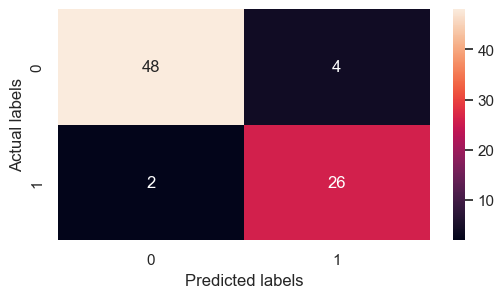

report :
               precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



In [25]:
accuracy = accuracy_score(y_test,y_pred)
cmat = confusion_matrix(y_test,y_pred)
crep = classification_report(y_test,y_pred)
print('knn accuracy: ',accuracy,'confusion matrix: ',cmat,sep="\n")
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(cmat,annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.show()
print(f"report :\n {crep}")

# Predict wheathe a targeted audience will purchase a product or not

In [26]:
new_data = np.array([[0, 30, 50000]])
prediction = knn_classifier.predict(scaler.transform (new_data))
if prediction[0] == 1:
    print("The targeted audience is likely to purchase the product.")
else:
    print("The targeted audience is unlikely to purchase the product.")

The targeted audience is unlikely to purchase the product.
